In [1]:
import pandas as pd
import numpy as np
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns


import glob
import os


In [2]:
syntactic_correct_df = pd.read_csv('syntactic correct.csv')
syntactic_correct_df = syntactic_correct_df.drop(['Unnamed: 0'],axis=1)
syntactic_correct_df

,llama-3-8b-dropout-0.2-1000,llama-3-8b-dropout-0.2-1000_eng,llama-3-8b-dropout-0.2-2000,llama-3-8b-dropout-0.2-2000_eng,llama-3-8b-dropout-0.2-3000,llama-3-8b-dropout-0.2-3000_eng,llama-3-8b-dropout-0.5-1000,llama-3-8b-dropout-0.5-1000_eng,llama-3-8b-dropout-0.5-2000,llama-3-8b-dropout-0.5-2000_eng,...,mistral-7b-v03-dropout-0.5-2000,mistral-7b-v03-dropout-0.5-2000_eng,mistral-7b-v03-dropout-0.5-3000,mistral-7b-v03-dropout-0.5-3000_eng,WestLake-7B-v2-dropout-0.5-1000,WestLake-7B-v2-dropout-0.5-1000_eng,WestLake-7B-v2-dropout-0.5-2000,WestLake-7B-v2-dropout-0.5-2000_eng,WestLake-7B-v2-dropout-0.5-3000,WestLake-7B-v2-dropout-0.5-3000_eng
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


C:\Users\moham\AppData\Local\Temp\ipykernel_14108\1019672638.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: True if str(x).strip().lower() == 'true' else False)


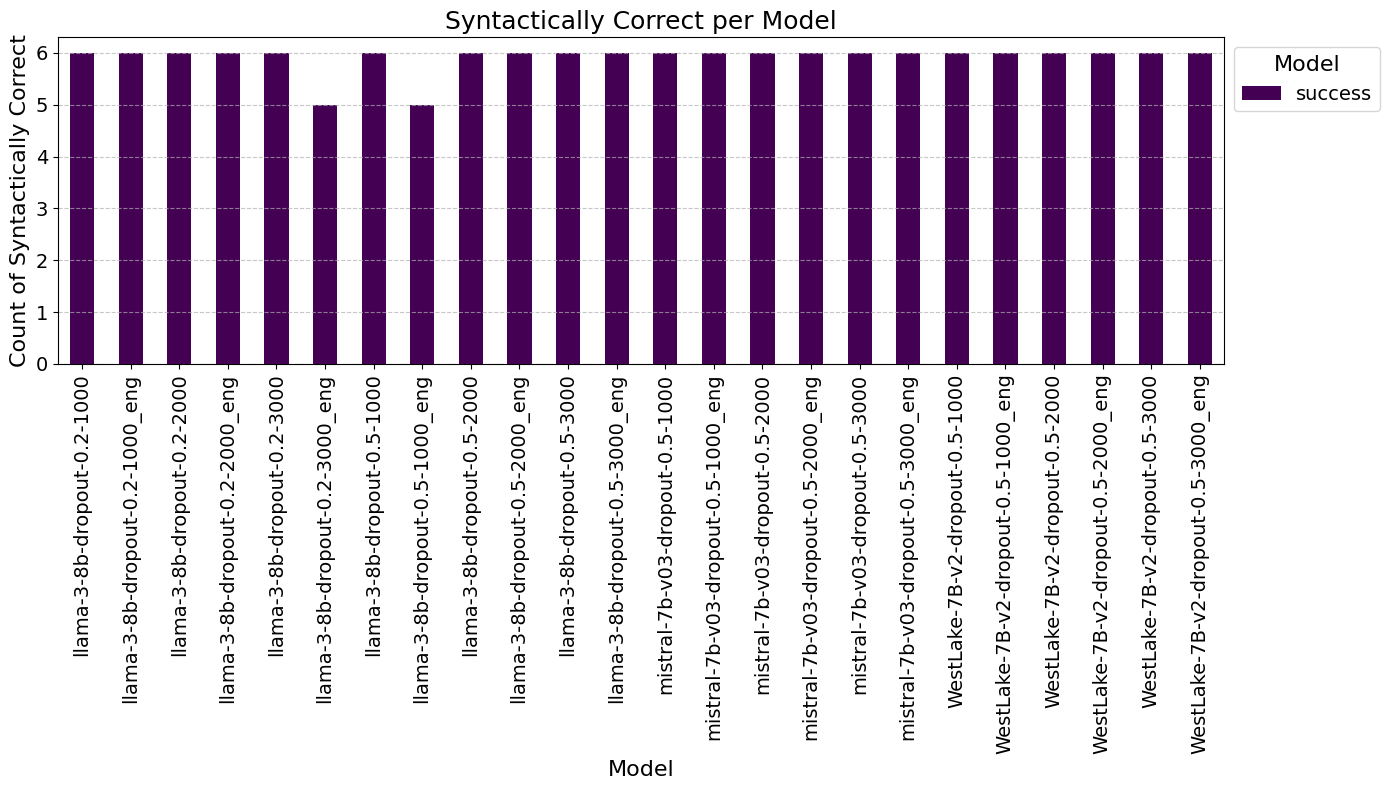

In [3]:

# Function to calculate success counts per model
def calculate_success_counts_per_model(df):
    # Convert all non-'True' values to False
    df = df.applymap(lambda x: True if str(x).strip().lower() == 'true' else False)
    return df.sum()
# Calculate success counts per model
success_counts_per_model = calculate_success_counts_per_model(syntactic_correct_df)
# Convert the Series to DataFrame for easier plotting
df_success_counts_per_model = success_counts_per_model.to_frame(name='success')

# Plotting the bar chart for success
fig, ax = plt.subplots(figsize=(14, 8))

df_success_counts_per_model.plot(kind='bar', ax=ax, colormap='viridis')
ax.set_title('Syntactically Correct per Model', fontsize=18)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Count of Syntactically Correct', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Model', fontsize=14, title_fontsize=16, bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("finetune Syntactically Correct Behavior Trees.png")

In [4]:
df_seccess_rate = pd.read_csv('seccess rate - extracted_info.csv')
df_seccess_rate = df_seccess_rate.drop(['Unnamed: 0'],axis=1)
df_seccess_rate

,llama-3-8b-dropout-0.2-1000,llama-3-8b-dropout-0.2-1000_eng,llama-3-8b-dropout-0.2-2000,llama-3-8b-dropout-0.2-2000_eng,llama-3-8b-dropout-0.2-3000,llama-3-8b-dropout-0.2-3000_eng,llama-3-8b-dropout-0.5-1000,llama-3-8b-dropout-0.5-1000_eng,llama-3-8b-dropout-0.5-2000,llama-3-8b-dropout-0.5-2000_eng,...,mistral-7b-v03-dropout-0.5-2000,mistral-7b-v03-dropout-0.5-2000_eng,mistral-7b-v03-dropout-0.5-3000,mistral-7b-v03-dropout-0.5-3000_eng,WestLake-7B-v2-dropout-0.5-1000,WestLake-7B-v2-dropout-0.5-1000_eng,WestLake-7B-v2-dropout-0.5-2000,WestLake-7B-v2-dropout-0.5-2000_eng,WestLake-7B-v2-dropout-0.5-3000,WestLake-7B-v2-dropout-0.5-3000_eng
0,False,False,False,True,False,TRUE,False,FALSE,True,True,...,False,False,False,True,False,False,False,False,False,True
1,False,False,True,False,False,Wrong,False,FALSE,False,False,...,False,False,False,False,False,False,True,False,True,False
2,False,True,False,True,False,FALSE,False,FALSE,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,True,False,FALSE,False,wrong,False,True,...,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,FALSE,False,FALSE,False,False,...,False,False,False,False,False,True,False,True,False,True
5,False,False,True,True,False,FALSE,False,FALSE,True,True,...,False,True,False,True,True,True,True,True,False,True


C:\Users\moham\AppData\Local\Temp\ipykernel_14108\2652270149.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: True if str(x).strip().lower() == 'true' else False)


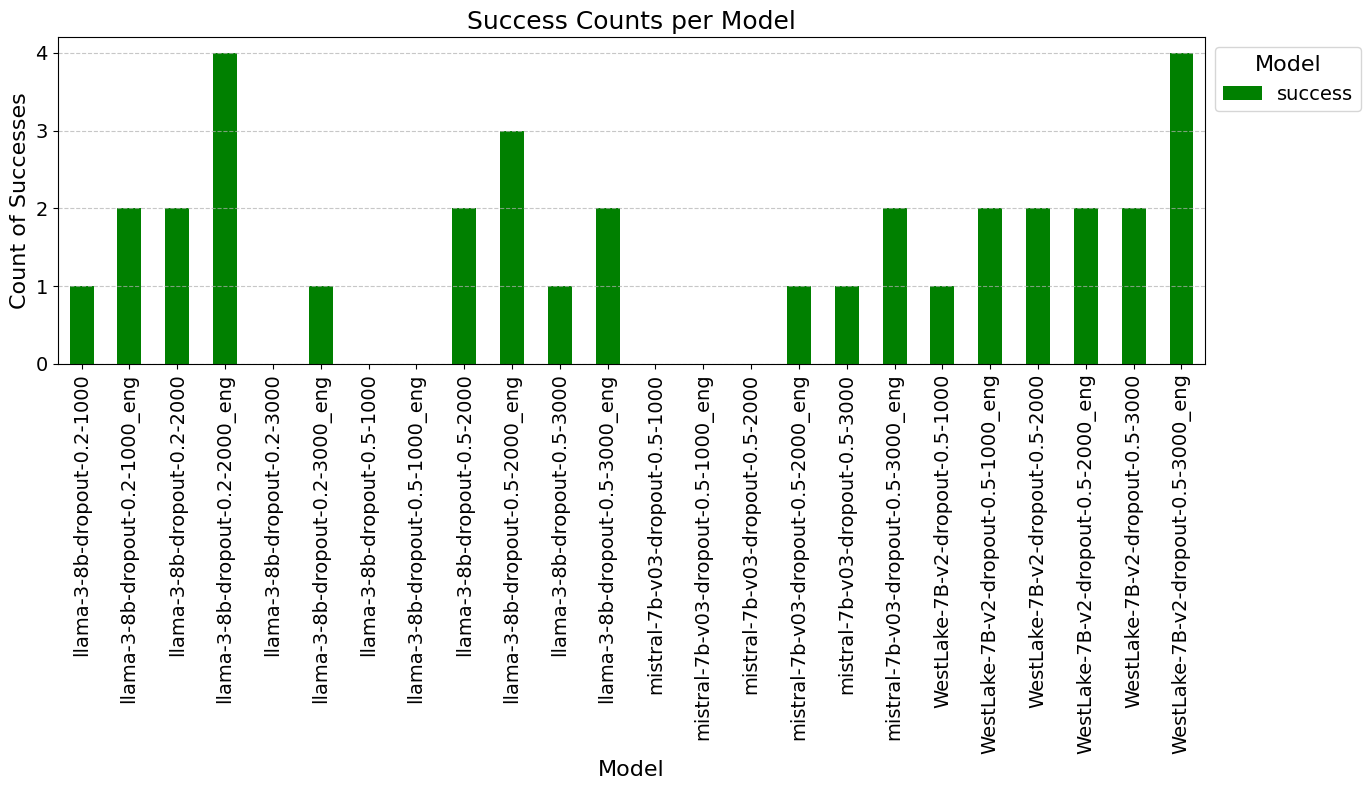

In [5]:

# Function to calculate success counts per model
def calculate_success_counts_per_model(df):
    # Convert all non-'True' values to False
    df = df.applymap(lambda x: True if str(x).strip().lower() == 'true' else False)
    return df.sum()
# Calculate success counts per model
success_counts_per_model = calculate_success_counts_per_model(df_seccess_rate)
# Convert the Series to DataFrame for easier plotting
df_success_counts_per_model = success_counts_per_model.to_frame(name='success')

# Plotting the bar chart for success
fig, ax = plt.subplots(figsize=(14, 8))

df_success_counts_per_model.plot(kind='bar', ax=ax, color='green')
ax.set_title('Success Counts per Model', fontsize=18)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Count of Successes', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(title='Model', fontsize=14, title_fontsize=16, bbox_to_anchor=(1, 1))
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig("finetune Success Counts per Model.png")

In [7]:
txt_files = ['golden label.txt',
    './new/llama-3-8b-dropout-0.2-1000.txt',
 './new/llama-3-8b-dropout-0.2-1000_eng.txt',
 './new/llama-3-8b-dropout-0.2-2000.txt',
 './new/llama-3-8b-dropout-0.2-2000_eng.txt',
 './new/llama-3-8b-dropout-0.2-3000.txt',
 './new/llama-3-8b-dropout-0.2-3000_eng.txt',
#  './new/llama-3-8b-dropout-0.5-1000-DTV.txt',
 './new/llama-3-8b-dropout-0.5-1000.txt',
#  './new/llama-3-8b-dropout-0.5-1000_eng-DTV.txt',
 './new/llama-3-8b-dropout-0.5-1000_eng.txt',
#  './new/llama-3-8b-dropout-0.5-2000-DTV.txt',
#  './new/llama-3-8b-dropout-0.5-2000_eng-DTV.txt',
 './new/llama-3-8b-dropout-0.5-2000.txt',
 './new/llama-3-8b-dropout-0.5-2000_eng.txt',
 './new/llama-3-8b-dropout-0.5-3000.txt',
 './new/llama-3-8b-dropout-0.5-3000_eng.txt',
 
 './new/mistral-7b-v03-dropout-0.5-1000.txt',
 './new/mistral-7b-v03-dropout-0.5-1000_eng.txt',
 './new/mistral-7b-v03-dropout-0.5-2000.txt',
 './new/mistral-7b-v03-dropout-0.5-2000_eng.txt',
 
 './new/mistral-7b-v03-dropout-0.5-3000.txt',
 './new/mistral-7b-v03-dropout-0.5-3000_eng.txt',
 
 './new/WestLake-7B-v2-dropout-0.5-1000.txt',
 './new/WestLake-7B-v2-dropout-0.5-1000_eng.txt',
 './new/WestLake-7B-v2-dropout-0.5-2000.txt',
 './new/WestLake-7B-v2-dropout-0.5-2000_eng.txt',
 './new/WestLake-7B-v2-dropout-0.5-3000.txt',
 './new/WestLake-7B-v2-dropout-0.5-3000_eng.txt',
 
 ]

In [8]:

# List to store the contents of each file
file_contents = {}

# Read each text file and store its content along with the filename
for file_path in txt_files:
    print(file_path)

    with open(file_path, 'r') as file:
        print('file_path',file_path)
        content = file.read()
        content_list = content.split('#######')
        file_contents[file_path.split('.t')[0]] = [item.strip() for item in content_list]


# Create a DataFrame from the list
df = pd.DataFrame(file_contents)

golden label.txt
file_path golden label.txt
./new/llama-3-8b-dropout-0.2-1000.txt
file_path ./new/llama-3-8b-dropout-0.2-1000.txt
./new/llama-3-8b-dropout-0.2-1000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-1000_eng.txt
./new/llama-3-8b-dropout-0.2-2000.txt
file_path ./new/llama-3-8b-dropout-0.2-2000.txt
./new/llama-3-8b-dropout-0.2-2000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-2000_eng.txt
./new/llama-3-8b-dropout-0.2-3000.txt
file_path ./new/llama-3-8b-dropout-0.2-3000.txt
./new/llama-3-8b-dropout-0.2-3000_eng.txt
file_path ./new/llama-3-8b-dropout-0.2-3000_eng.txt
./new/llama-3-8b-dropout-0.5-1000.txt
file_path ./new/llama-3-8b-dropout-0.5-1000.txt
./new/llama-3-8b-dropout-0.5-1000_eng.txt
file_path ./new/llama-3-8b-dropout-0.5-1000_eng.txt
./new/llama-3-8b-dropout-0.5-2000.txt
file_path ./new/llama-3-8b-dropout-0.5-2000.txt
./new/llama-3-8b-dropout-0.5-2000_eng.txt
file_path ./new/llama-3-8b-dropout-0.5-2000_eng.txt
./new/llama-3-8b-dropout-0.5-3000.txt
file_path ./new/ll

In [9]:
def rouge_scores(df):
    # Initialize the ROUGE scorer
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    
    # Function to calculate ROUGE-L
    def calculate_rouge(row, model_name):
        if pd.isna(row[model_name]) or pd.isna(row['golden label']):
            return None  # Skip calculation if either the model or golden label data is missing
        scores = scorer.score(row['golden label'], row[model_name])
        return scores['rougeL'].fmeasure  # Returning the F-measure of ROUGE-L

    # List of model columns to compare with 'golden_label'
    model_columns = [col for col in df.columns if col != 'golden label']  # Exclude the 'golden_label' from comparison list
    
    # Calculate ROUGE-L for each model comparison with 'golden_label'
    for model in model_columns:
        df[f'ROUGE-L_{model}'] = df.apply(calculate_rouge, axis=1, args=(model,))


rouge_scores(df)


In [10]:
# # Extracting columns of interest after renaming
# def extract_and_rename_rouge_columns(df):
#     rouge_columns = [col for col in df.columns if col.startswith('ROUGE-L_')]
#     df_subset = df[rouge_columns].reset_index(drop=True)
#     df_subset.rename(columns=lambda x: x.replace('ROUGE-L_', ''), inplace=True)
#     return df_subset

def extract_and_rename_rouge_columns(df):
    rouge_columns = [col for col in df.columns if col.startswith('ROUGE-L_')]
    df_subset = df[rouge_columns].reset_index(drop=True)
    df_subset.rename(columns=lambda x: x.replace('ROUGE-L_', '').replace('./new/', ''), inplace=True)
    return df_subset




ROUGE_L_df = extract_and_rename_rouge_columns(df)

ROUGE_L_df

,llama-3-8b-dropout-0.2-1000,llama-3-8b-dropout-0.2-1000_eng,llama-3-8b-dropout-0.2-2000,llama-3-8b-dropout-0.2-2000_eng,llama-3-8b-dropout-0.2-3000,llama-3-8b-dropout-0.2-3000_eng,llama-3-8b-dropout-0.5-1000,llama-3-8b-dropout-0.5-1000_eng,llama-3-8b-dropout-0.5-2000,llama-3-8b-dropout-0.5-2000_eng,llama-3-8b-dropout-0.5-3000,llama-3-8b-dropout-0.5-3000_eng,mistral-7b-v03-dropout-0.5-1000,mistral-7b-v03-dropout-0.5-1000_eng,mistral-7b-v03-dropout-0.5-2000,mistral-7b-v03-dropout-0.5-2000_eng,mistral-7b-v03-dropout-0.5-3000,mistral-7b-v03-dropout-0.5-3000_eng,WestLake-7B-v2-dropout-0.5-1000,WestLake-7B-v2-dropout-0.5-1000_eng,WestLake-7B-v2-dropout-0.5-2000,WestLake-7B-v2-dropout-0.5-2000_eng,WestLake-7B-v2-dropout-0.5-3000,WestLake-7B-v2-dropout-0.5-3000_eng
0,0.765432,0.876712,0.650000,1.000000,0.606061,1.000000,0.800000,0.935065,0.840580,1.000000,0.264706,1.000000,0.850000,0.906667,0.845070,0.935065,0.842105,0.974359,0.850000,0.906667,0.746667,0.845070,0.876712,1.000000
1,0.590909,0.819277,0.826087,0.891566,0.882353,0.931818,0.704545,0.775000,0.906977,0.804878,0.947368,0.953488,0.917647,0.860465,0.917647,0.942529,0.557692,0.860465,0.931818,0.917647,0.953488,0.864198,0.953488,0.933333
2,0.846154,0.800000,0.731183,0.800000,0.750000,0.820513,0.843373,0.705882,0.821053,0.702703,0.873563,0.727273,0.800000,0.833333,0.800000,0.800000,0.809524,0.717391,0.902439,0.795181,0.731707,0.794872,0.904762,0.752941
3,0.629630,0.779661,0.478261,0.838710,0.741935,0.838710,0.641509,0.862069,0.478261,0.690909,0.200000,0.918033,0.618182,0.933333,0.478261,0.933333,0.641509,1.000000,0.541667,0.690909,0.478261,0.800000,0.478261,0.800000
4,0.754098,0.758621,0.603774,0.466019,0.793103,0.750000,0.677419,0.793103,0.596491,0.774194,0.607143,0.785714,0.571429,0.703704,0.571429,0.769231,0.571429,0.656250,0.571429,0.754098,0.782609,0.703704,0.571429,0.703704
5,0.692308,0.545455,0.866667,1.000000,0.514286,0.529412,0.692308,0.545455,0.866667,1.000000,0.000000,0.545455,0.516129,0.514286,0.444444,1.000000,0.450000,1.000000,0.709677,1.000000,1.000000,1.000000,0.600000,0.812500


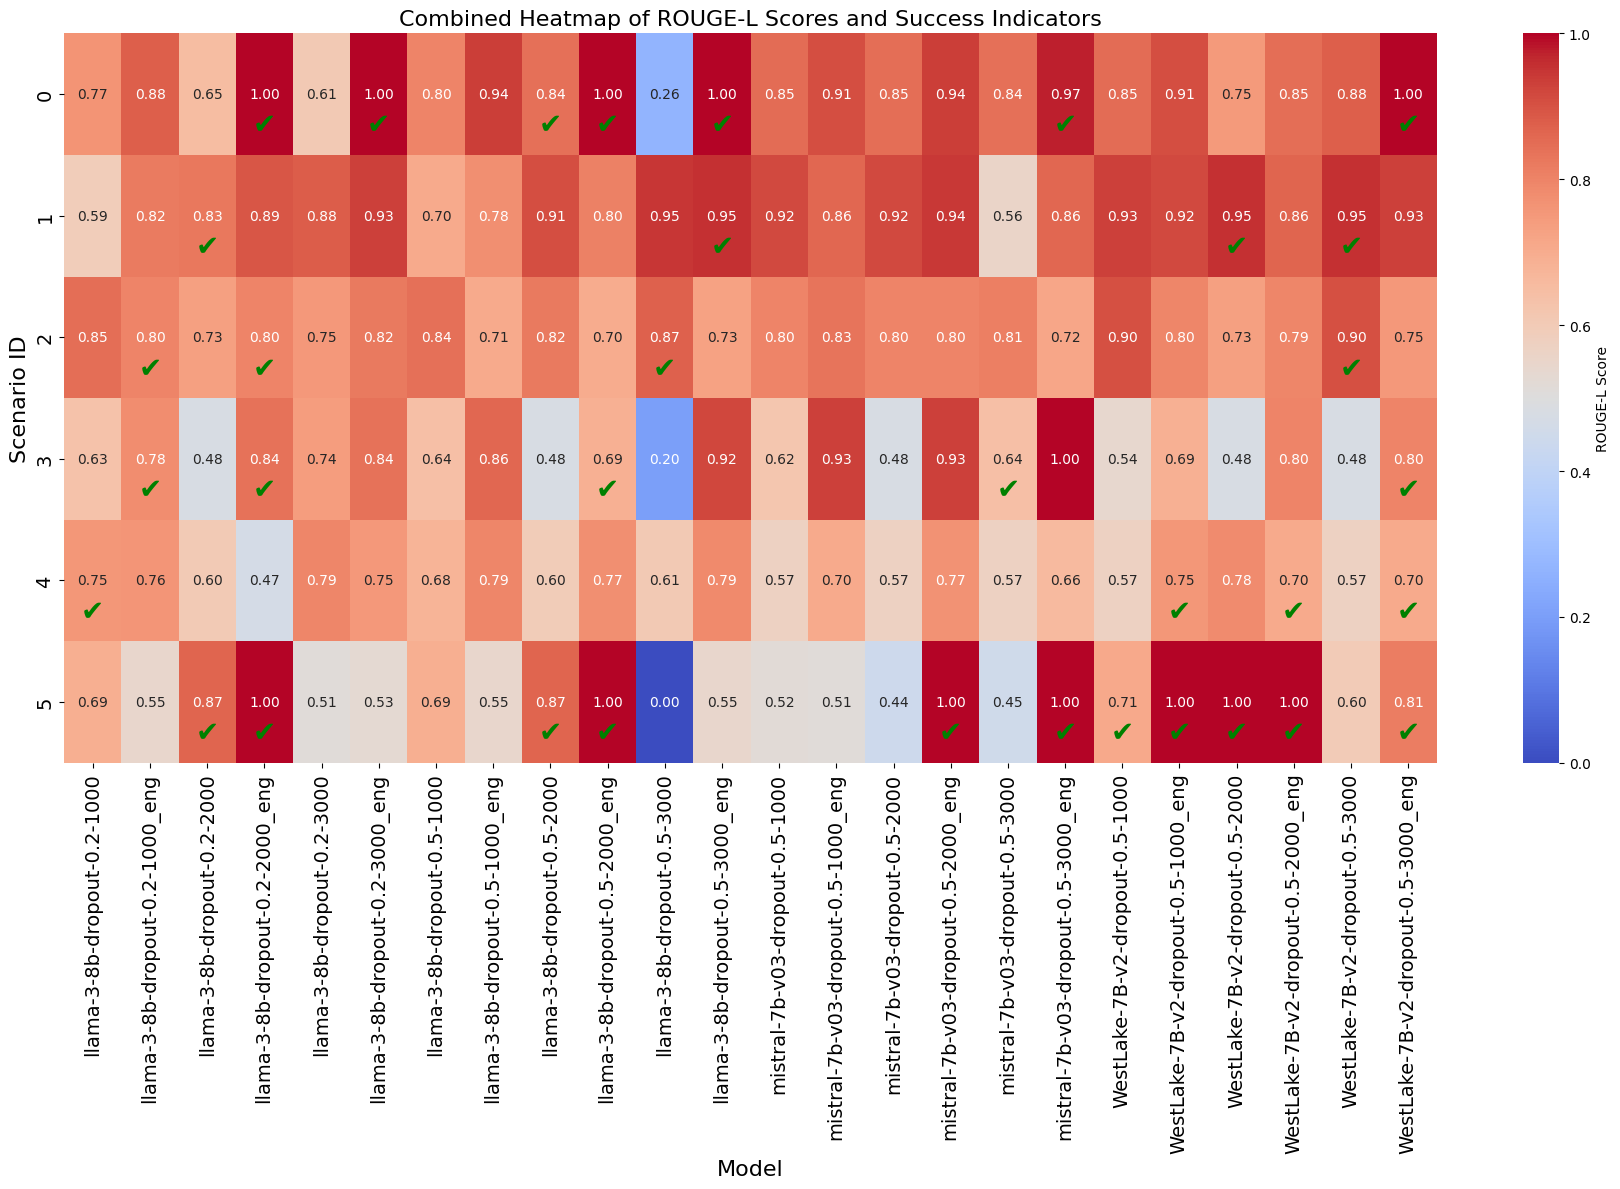

In [11]:
# Ensure both dataframes have the same column order and structure
assert list(df_seccess_rate.columns) == list(ROUGE_L_df.columns), "Column mismatch between dataframes"

# Create a combined heatmap
fig, ax = plt.subplots(figsize=(18, 12))

# Plot ROUGE-L scores heatmap
sns.heatmap(ROUGE_L_df, annot=True, cmap='coolwarm', cbar=True, vmin=0, vmax=1,
            cbar_kws={'label': 'ROUGE-L Score'}, fmt='.2f', ax=ax, annot_kws={"size": 10})

# Add success indicators
for y in range(ROUGE_L_df.shape[0]):
    for x in range(ROUGE_L_df.shape[1]):
        value = df_seccess_rate.iloc[y, x]
        # print(value)
        if value in ['True', 'TRUE', 'true',np.True_]:
            # print(value)
            ax.text(x + 0.5, y + 0.75, '✔', color='green', ha='center', va='center', fontsize=20)
        else:
            pass
            # ax.text(x + 0.5, y + 0.75, '✘', color='black', ha='center', va='center', fontsize=16)

# Set titles and labels
ax.set_title("Combined Heatmap of ROUGE-L Scores and Success Indicators", fontsize=16)
ax.set_xlabel('Model', fontsize=16)
ax.set_ylabel('Scenario ID', fontsize=16)
ax.tick_params(axis='x', labelsize=14, rotation=90)
ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()
plt.savefig("Combined_Heatmap_with_Success_Indicators.png")
plt.show()


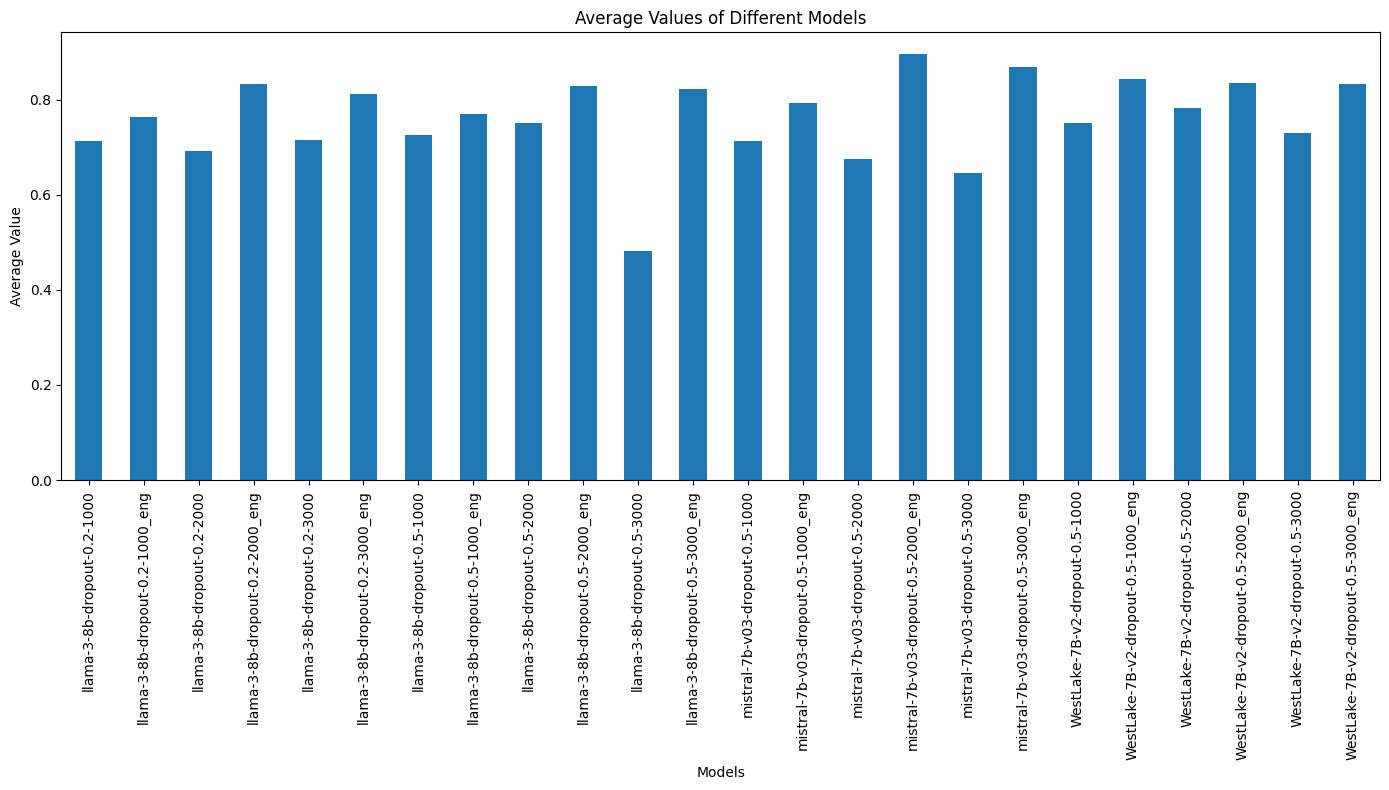

In [12]:
# Calculate the average for each model
averages = ROUGE_L_df.mean()

# Plot the averages
plt.figure(figsize=(14, 8))
averages.plot(kind='bar')
plt.title('Average Values of Different Models')
plt.xlabel('Models')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.show()

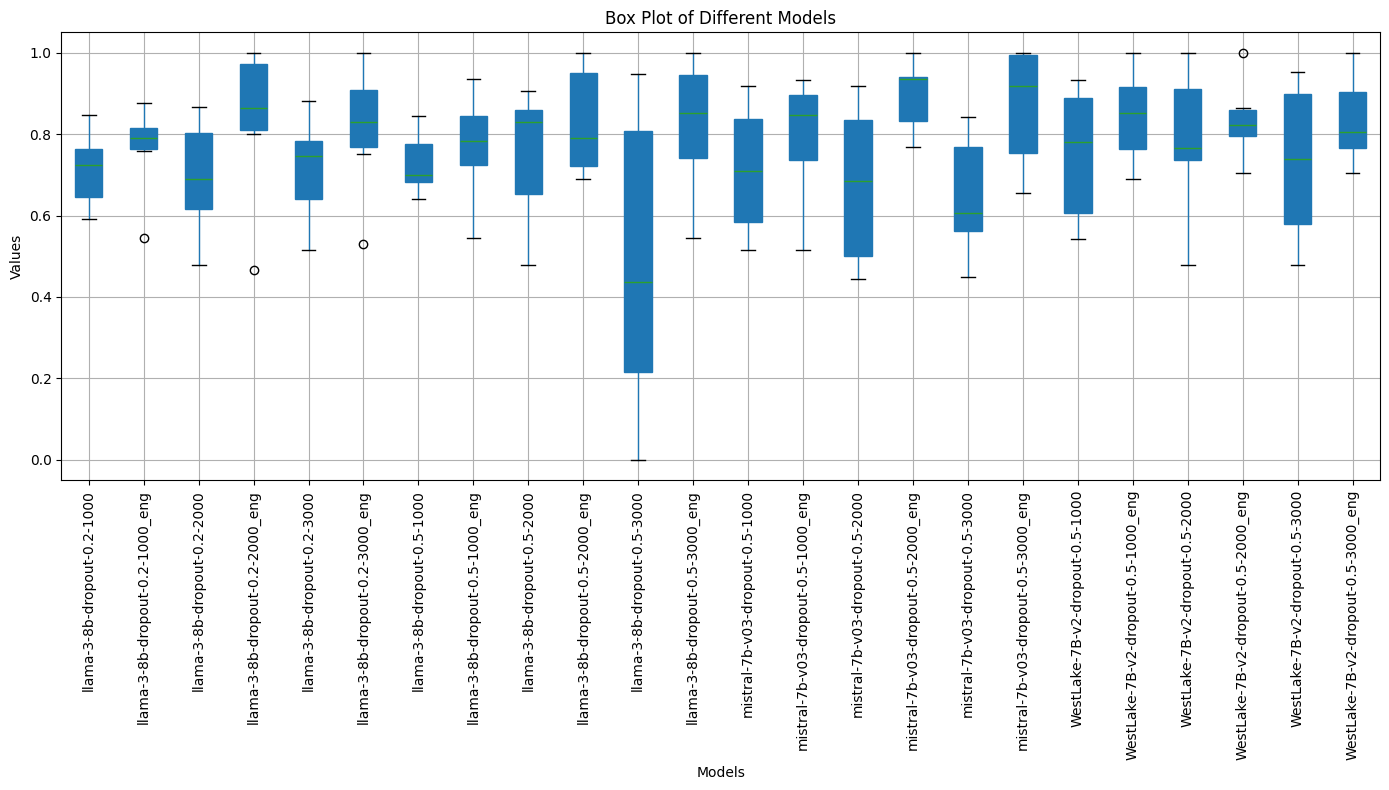

In [13]:
# Convert the data to a DataFrame
df = ROUGE_L_df
# Plot the data as a box plot with yellow boxes
plt.figure(figsize=(14, 8))
box = df.boxplot(rot=90, patch_artist=True)

# Set the color of each box to yellow
for patch in box.artists:
    patch.set_facecolor('yellow')

plt.title('Box Plot of Different Models')
plt.xlabel('Models')
plt.ylabel('Values')
plt.tight_layout()

# Display the plot
plt.show()



# Non-Functional BT

In [36]:
# Path to the directory containing the CSV files
directory_path = './csv/'

# List all files in the directory
file_list = os.listdir(directory_path)

# Filter the list to include only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]


######

# Read all CSV files into a list of dataframes
dataframes = [pd.read_csv(f'./csv/{file}') for file in csv_files]

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, keys=[(file.split('/')[-1]).split('.c')[0] for file in file_list])

# Calculate the average similarity for each model configuration
average_similarity = combined_df.groupby(level=0)['similarity'].mean().reset_index()
average_similarity.columns = ['Model Configuration', 'Average Similarity']



<Figure size 2000x700 with 0 Axes>

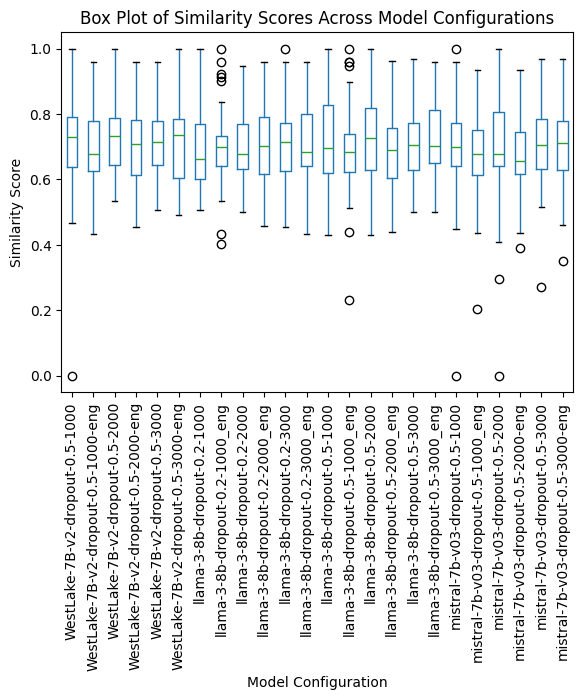

In [31]:
# Reset the index to have model configuration as a column
x = combined_df
x.reset_index(level=0, inplace=True)
x.columns = ['Model Configuration', 'original_response', 'predicted_response', 'similarity']

# Plot the box plot
plt.figure(figsize=(20, 7))
x.boxplot(column='similarity', by='Model Configuration', grid=False)
plt.xlabel('Model Configuration')
plt.ylabel('Similarity Score')
plt.title('Box Plot of Similarity Scores Across Model Configurations')
plt.suptitle('')

# Display the plot
plt.xticks(rotation=90)
plt.show()

In [ ]:
path_to_new_folder = r"./csv"
# def get_csv_files(folder_path):
#     return [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]


In [32]:
average_similarity

,Model Configuration,Average Similarity
0,WestLake-7B-v2-dropout-0.5-1000,0.707878
1,WestLake-7B-v2-dropout-0.5-1000-eng,0.708241
2,WestLake-7B-v2-dropout-0.5-2000,0.731493
3,WestLake-7B-v2-dropout-0.5-2000-eng,0.699363
4,WestLake-7B-v2-dropout-0.5-3000,0.719841
5,WestLake-7B-v2-dropout-0.5-3000-eng,0.711509
6,llama-3-8b-dropout-0.2-1000,0.694509
7,llama-3-8b-dropout-0.2-1000_eng,0.698009
8,llama-3-8b-dropout-0.2-2000,0.711480
9,llama-3-8b-dropout-0.2-2000_eng,0.701349


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Path to the directory containing the CSV files
directory_path = './csv/'

# List all files in the directory
file_list = os.listdir(directory_path)

# Filter the list to include only CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Read all CSV files into a list of dataframes
dataframes = [pd.read_csv(os.path.join(directory_path, file)) for file in csv_files]

# Combine all dataframes into a single dataframe
combined_df = pd.concat(dataframes, keys=[os.path.splitext(file)[0] for file in csv_files])

# Reset index to get 'Model Configuration' as a column
combined_df.reset_index(level=0, inplace=True)
combined_df.rename(columns={'level_0': 'Model Configuration'}, inplace=True)

# Convert 'success' and 'syntactic_correct' columns to boolean
combined_df['success'] = combined_df['success'].apply(lambda x: True if str(x).strip().lower() == 'true' else False)
combined_df['syntactic_correct'] = combined_df['syntactic_correct'].apply(lambda x: True if str(x).strip().lower() != 'wrong' else False)

# Plotting the box plot for success
plt.figure(figsize=(14, 8))
combined_df.boxplot(column='success', by='Model Configuration', grid=False, vert=False)
plt.title('Success Rate per Model Configuration')
plt.suptitle('')
plt.xlabel('Success Rate')
plt.ylabel('Model Configuration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("success_rate_per_model_configuration.png")
plt.show()

# Plotting the box plot for syntactic correctness
plt.figure(figsize=(14, 8))
combined_df.boxplot(column='syntactic_correct', by='Model Configuration', grid=False, vert=False)
plt.title('Syntactic Correctness per Model Configuration')
plt.suptitle('')
plt.xlabel('Syntactic Correctness')
plt.ylabel('Model Configuration')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("syntactic_correctness_per_model_configuration.png")
plt.show()


KeyError: 'success'